In [1]:
# ML Assignment 2
# 1901CS44
# Pushpendra Nagle
 
# Import Libraries
import pandas as pd                         
import numpy as np                          
import matplotlib.pyplot as plt             
import seaborn as sb                        
from termcolor import colored as cl         
       
from sklearn.cluster import DBSCAN          # import dbscan
from sklearn.cluster import KMeans          # import kmeans
from sklearn import metrics

In [2]:
# Import data and create dataframes
df_blobs =  pd.read_csv('cluster_blobs.csv')
df_moons =  pd.read_csv('cluster_moons.csv')
df_circles =  pd.read_csv('cluster_circles.csv')

In [3]:
df_blobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [4]:
df_moons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     1500 non-null   float64
 1   X_2     1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [5]:
df_circles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [9]:
# Cleaning data
df_blobs.dropna(inplace = True)
print(df_blobs.isnull().sum())

X1    0
X2    0
dtype: int64


In [10]:
# Cleaning data
df_moons.dropna(inplace = True)
print(df_moons.isnull().sum())

X_1    0
X_2    0
dtype: int64


In [11]:
# Cleaning data
df_circles.dropna(inplace = True)
print(df_circles.isnull().sum())

X1    0
X2    0
dtype: int64


In [12]:
df_blobs.describe()

,X1,X2
count,1500.000000,1500.000000
mean,-0.379401,2.141568
std,5.215288,6.308511
min,-10.503508,-9.498748
25%,-6.400126,-5.909959
50%,0.676300,5.709203
75%,4.620075,6.934017
max,9.370845,9.871754


In [13]:
df_moons.describe()

,X_1,X_2
count,1500.000000,1500.000000
mean,0.498501,0.251743
std,0.868054,0.496365
min,-1.112339,-0.628397
25%,-0.036013,-0.202562
50%,0.497101,0.246369
75%,1.037322,0.718451
max,2.095098,1.119580


In [14]:
df_circles.describe()

,X1,X2
count,1500.000000,1500.000000
mean,-0.001774,0.002696
std,0.521421,0.524787
min,-1.160050,-1.056985
25%,-0.286157,-0.286841
50%,-0.008298,0.003268
75%,0.285604,0.294371
max,1.093118,1.144814


In [16]:
#renaming moons columns to have same header as other datasets
df_moons.rename({"X_1": 'X1', 'X_2': 'X2'}, axis = 1, inplace = True)

In [17]:
# function to plot graphs for data
def plot_graphs(data, str):
  plt.title(f'Cluster {str}', fontsize = 17)
  plt.xlabel('X1', fontsize = 13)
  plt.ylabel('X2', fontsize = 13)
  data.plot.scatter(x='X1', y='X2')
  plt.xticks()
  plt.savefig(f'data_{str}.png')
  plt.show()

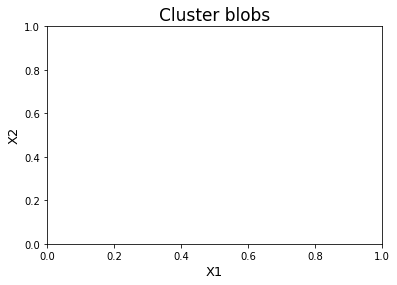

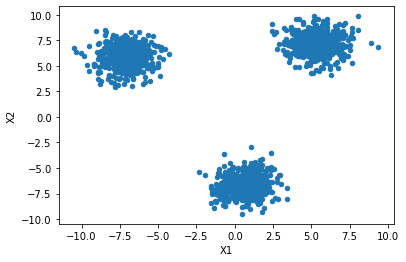

In [20]:
# plot graphs
plot_graphs(df_blobs,'blobs')

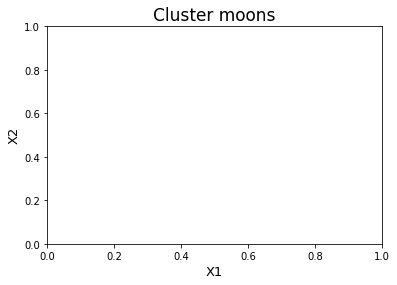

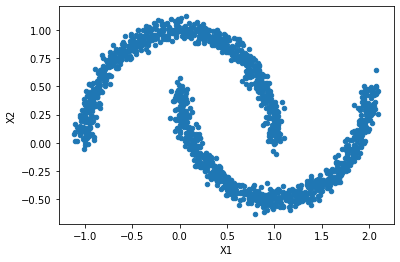

In [21]:
plot_graphs(df_moons,'moons')


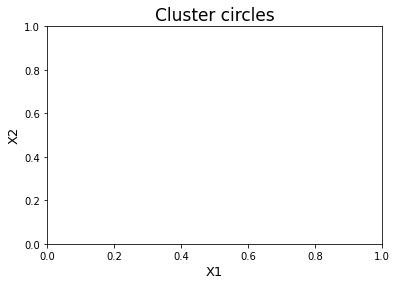

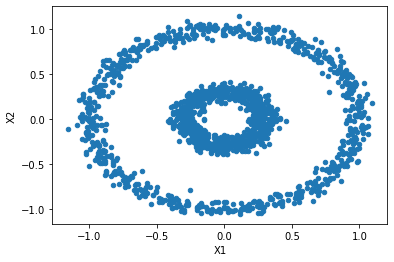

In [22]:
plot_graphs(df_circles,'circles')

In [23]:
# fn to plot graphs for clusters after modelling and print silouhette score
def display_print_score(model,data, model_name, data_name):
    labels = model.fit_predict(data)
    sil_score = metrics.silhouette_score(data, labels, metric='euclidean')
    print(f'Silhouette score: {model_name} {data_name}',sil_score)
    plt.figure()
    sb.scatterplot(data=data,x='X1',y='X2',hue=labels)
    plt.savefig(f'{model_name}_{data_name}.png')
    plt.show()

Silhouette score: DBSCAN blobs 0.8625486425630479


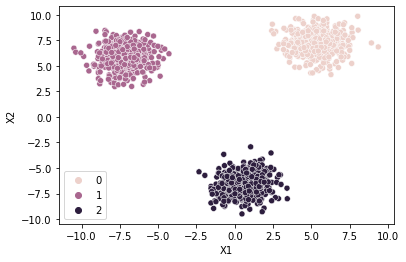

Silhouette score: DBSCAN moons 0.33344160815186463


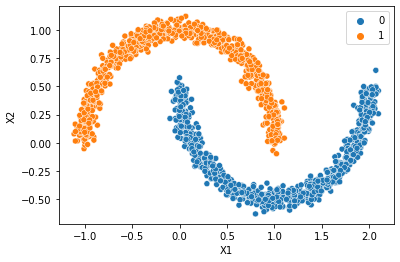

Silhouette score: DBSCAN circles 0.20829174427109967


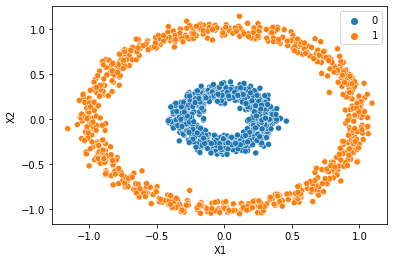

In [24]:
# call function for dbscan
model_blobs = DBSCAN(eps=1.5)
model_moons = DBSCAN(eps=0.15)
model_circles = DBSCAN(eps=0.15)
display_print_score(model_blobs,df_blobs,'DBSCAN','blobs')
display_print_score(model_moons,df_moons,'DBSCAN','moons')
display_print_score(model_circles,df_circles,'DBSCAN','circles')

Silhouette score: K-means blobs 0.8625486425630479


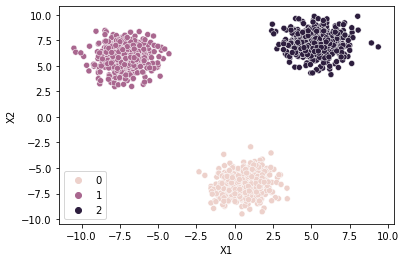

Silhouette score: K-means moons 0.49041236609392724


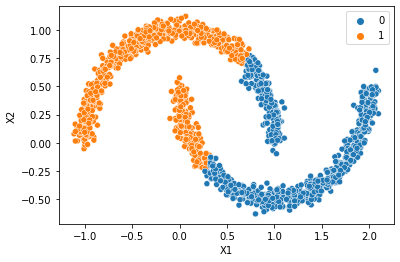

Silhouette score: K-means circles 0.29363327994289


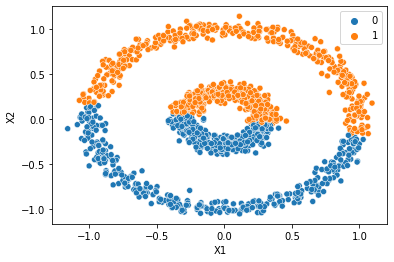

In [26]:
# call function for k means
model_blobs = KMeans(n_clusters = 3, init='k-means++',random_state=0).fit(df_blobs)
model_moons = KMeans(n_clusters = 2, init='k-means++',random_state=0).fit(df_circles)
model_circles = KMeans(n_clusters = 2, init='k-means++',random_state=0).fit(df_moons)
display_print_score(model_blobs,df_blobs,'K-means','blobs')
display_print_score(model_moons,df_moons,'K-means','moons')
display_print_score(model_circles,df_circles,'K-means','circles')